# Bank Marketing Dataset -Term Deposit Subscription



# A. Attributes Description: <br>

Input variables:<br>
# 1. bank client data:<br>
<a id="bank_client_data"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.
# 2. Related with the last contact of the current campaign:
<a id="last_contact"></a>
8 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
# 3. other attributes:<br>
<a id="other_attributes"></a>
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
21 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

### <a id="deliverable_one">Deliverable one</a>

In [1]:
#improting all important and Necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score


Bad key "text.kerning_factor" on line 4 in
G:\DOWNLOADS\Programs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
G:\DOWNLOADS\Programs\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('bank.csv',delimiter=',')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 1.Univariate Analysis

<h3> Exploring the Basics </h3>
<a id="overall_analysis"></a>
## Summary:
***
<ul>
<li type="square"> <b>Mean Age</b> is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)</li><br>
<li type="square"> The <b>mean balance</b> is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.</li><br>
<li type="square">As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, <b>duration is obtained after the call is made to the potential client</b> so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit  is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client. </li><br>
</ul>

**Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".**


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Fortunately, there are no missing values. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# No missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
categorical=['deposit','job','marital','education','default','housing','contact','loan','poutcome','month','day']
numerical=['age','balance','duration','campaign','pdays','previous']

In [8]:
df=df[categorical+numerical]
df.shape

(11162, 17)

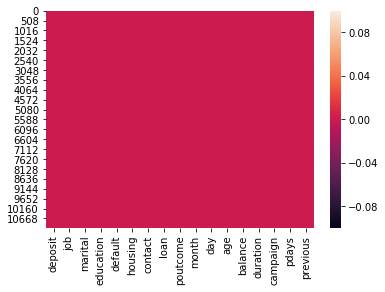

In [9]:
#to check weather any missing data is present or not
sns.heatmap(df.isnull())

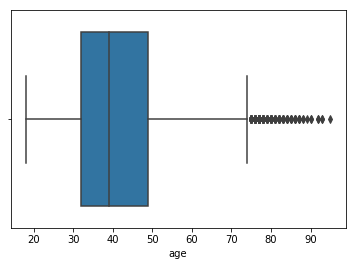

In [10]:
sns.boxplot(x=df['age'], data=df)

Age column has some outliers. The median age is about 40 years. There are some customers above 90 years of age. This data might have to be checked

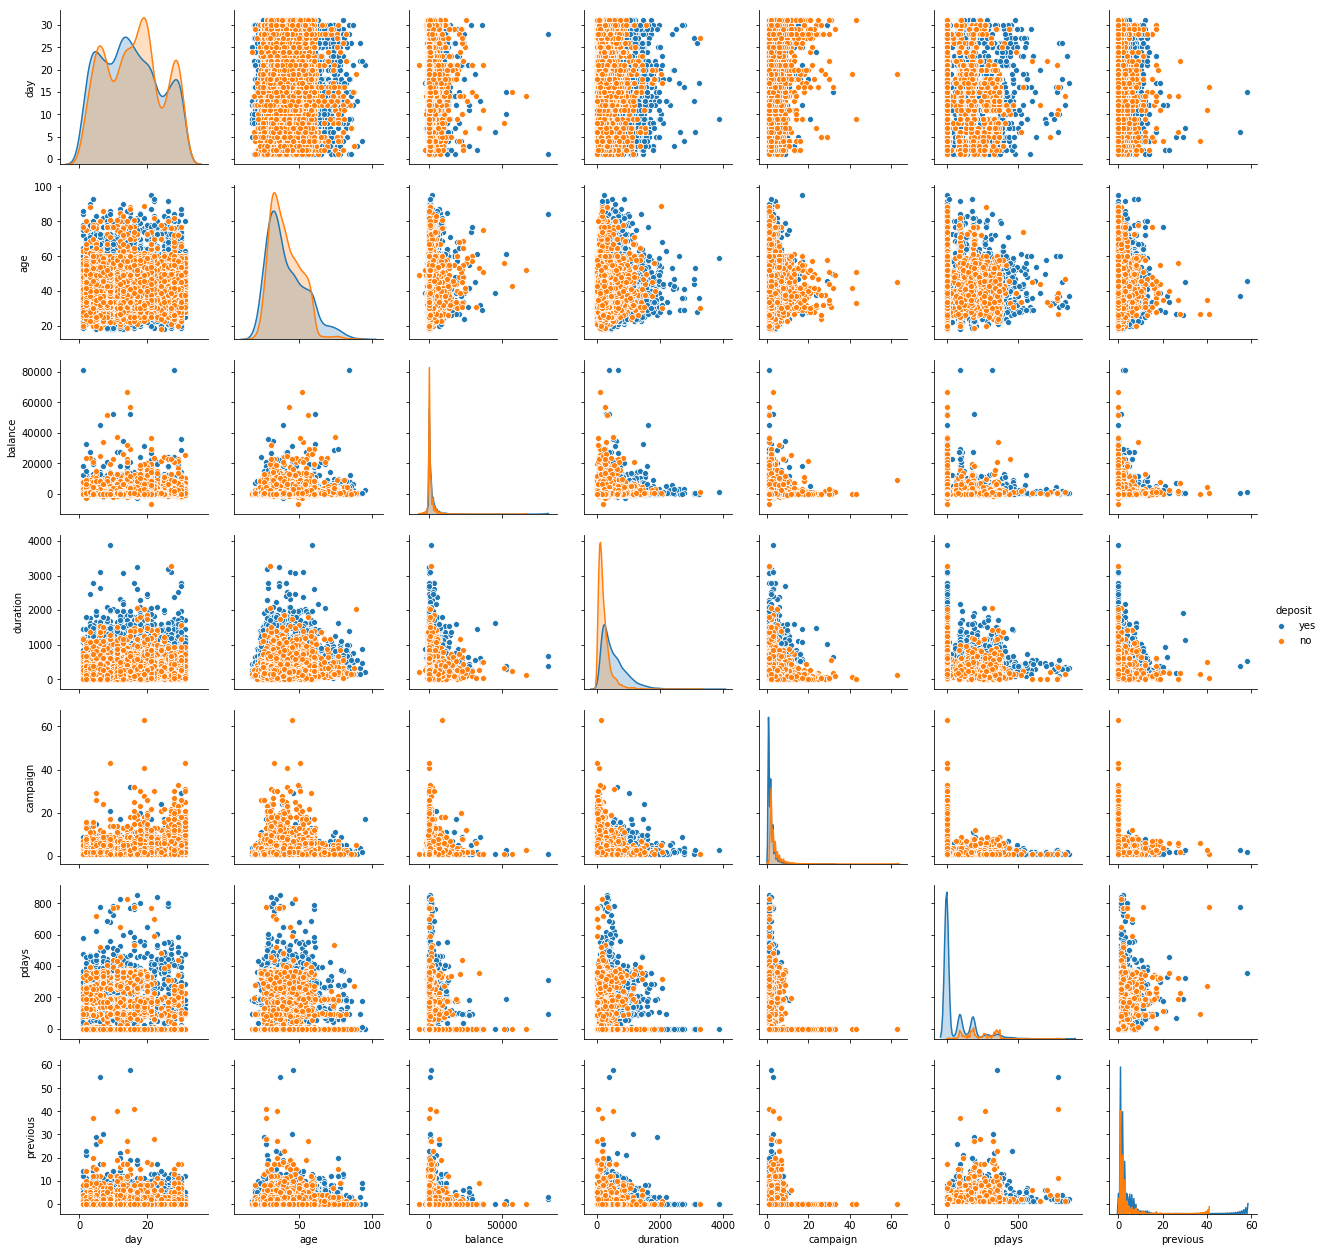

In [11]:
#histograms from the pair plots
sns.pairplot(df,hue='deposit')

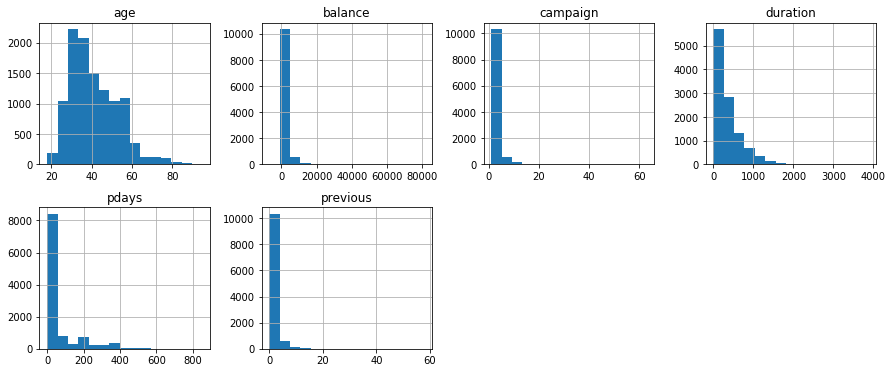

In [12]:
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

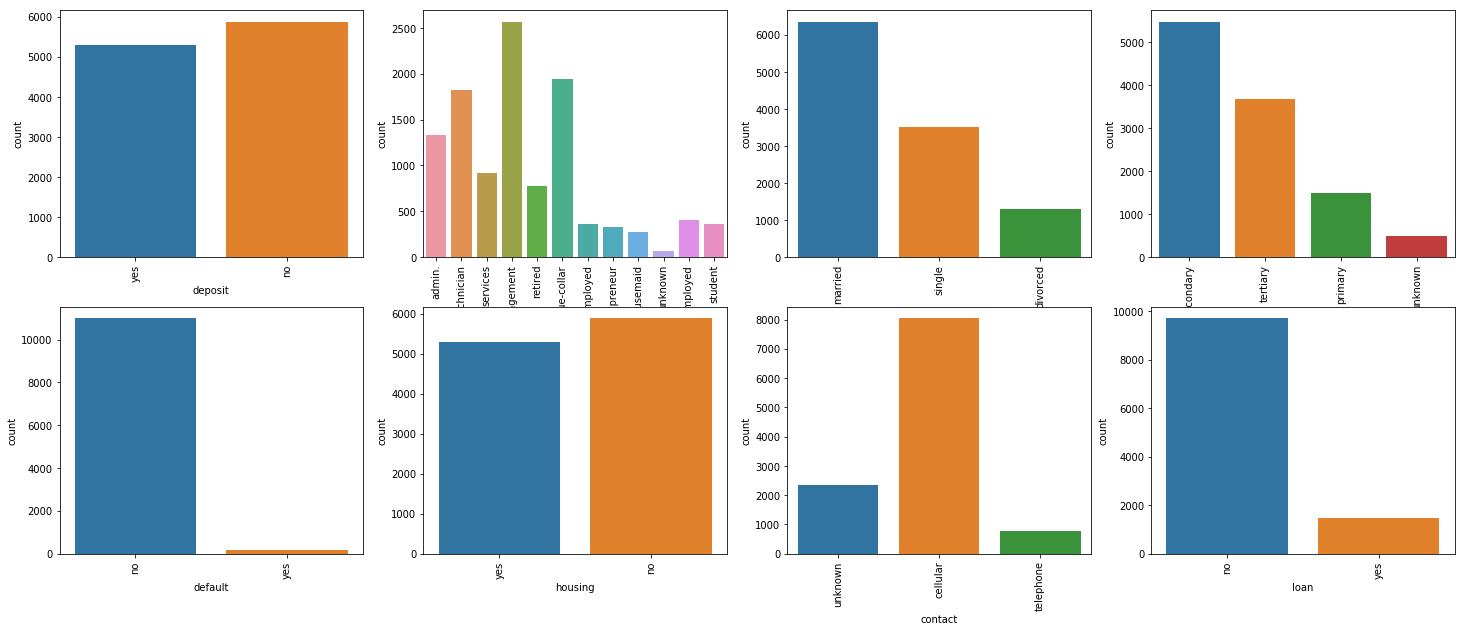

In [13]:

fig, ax = plt.subplots(2, 4, figsize=(25, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Data Cleansing 

### 2.1 Deal with missing data <br>
There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

In [14]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

In [15]:
# Step 2: Replace 'unknown' in job and education with 'other'
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

## Let's create Dummy variables or label Encoding 
* Since machine learning algorithms only take numerical values, all five categorical variables (job, education, default, housing and loan) are transformed into dummy variables.

* Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories.

In [16]:
df[categorical].head()

,deposit,job,marital,education,default,housing,contact,loan,poutcome,month,day
0,yes,admin.,married,secondary,no,yes,unknown,no,unknown,may,5
1,yes,admin.,married,secondary,no,no,unknown,no,unknown,may,5
2,yes,technician,married,secondary,no,yes,unknown,no,unknown,may,5
3,yes,services,married,secondary,no,yes,unknown,no,unknown,may,5
4,yes,admin.,married,tertiary,no,no,unknown,no,unknown,may,5


In [17]:
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

In [18]:
df.head()

,deposit,job,marital,education,default,housing,contact,loan,poutcome,month,day,age,balance,duration,campaign,pdays,previous
0,yes,admin.,married,secondary,0,1,unknown,0,unknown,may,5,59,2343,1042,1,-1,0
1,yes,admin.,married,secondary,0,0,unknown,0,unknown,may,5,56,45,1467,1,-1,0
2,yes,technician,married,secondary,0,1,unknown,0,unknown,may,5,41,1270,1389,1,-1,0
3,yes,services,married,secondary,0,1,unknown,0,unknown,may,5,55,2476,579,1,-1,0
4,yes,admin.,married,tertiary,0,0,unknown,0,unknown,may,5,54,184,673,2,-1,0


In [19]:
df['poutcome']=df['poutcome'].map({'unknown': 0,'failure': 1,'success':2})
df['job']=df['job'].map({'blue-collar':0,'management':1,'technician':2,'admin.':3,'services':4,'retired':5,'self-employed':6,'entrepreneur':7,'unemployed':8,'housemaid':9,'student':10,'other':11})
df['marital']=df['marital'].map({'married':0,'single':1,'divorced':2})
df['contact']=df['contact'].map({'cellular':0,'unknown':1,'telephone':2})
df['education']=df['education'].map({'secondary':0,'tertiary':1,'primary':2,'other':3})
lst = [df]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [20]:
df.head()

,deposit,job,marital,education,default,housing,contact,loan,poutcome,month,day,age,balance,duration,campaign,pdays,previous,month_int
0,yes,3,0,0,0,1,1,0,0,may,5,59,2343,1042,1,-1,0,5.0
1,yes,3,0,0,0,0,1,0,0,may,5,56,45,1467,1,-1,0,5.0
2,yes,2,0,0,0,1,1,0,0,may,5,41,1270,1389,1,-1,0,5.0
3,yes,4,0,0,0,1,1,0,0,may,5,55,2476,579,1,-1,0,5.0
4,yes,3,0,1,0,0,1,0,0,may,5,54,184,673,2,-1,0,5.0


In [21]:
df.drop(['month'],axis=1,inplace=True)
df['job']=df['job'].fillna(1)
df['job']=df['job'].astype(int)
df['month_int']=df['month_int'].astype(int)
df['job']=df['job'].astype(int)
df['month_int']=df['month_int'].astype(int)


In [22]:
df.head()

,deposit,job,marital,education,default,housing,contact,loan,poutcome,day,age,balance,duration,campaign,pdays,previous,month_int
0,yes,3,0,0,0,1,1,0,0,5,59,2343,1042,1,-1,0,5
1,yes,3,0,0,0,0,1,0,0,5,56,45,1467,1,-1,0,5
2,yes,2,0,0,0,1,1,0,0,5,41,1270,1389,1,-1,0,5
3,yes,4,0,0,0,1,1,0,0,5,55,2476,579,1,-1,0,5
4,yes,3,0,1,0,0,1,0,0,5,54,184,673,2,-1,0,5


In [23]:
df.isnull().sum()

deposit      0
job          0
marital      0
education    0
default      0
housing      0
contact      0
loan         0
poutcome     0
day          0
age          0
balance      0
duration     0
campaign     0
pdays        0
previous     0
month_int    0
dtype: int64

### Outliers:
The outliers may suggest experimental errors, variability in a measurement, or an anomaly. The age of a person may wrongly be recorded as 200 rather than 20 Years. Such an outlier should definitely be discarded from the dataset.
However, not all outliers are bad. Some outliers signify that data is significantly different from others. For example, it may indicate an anomaly like bank fraud or a rare disease.

#### Significance of outliers:

* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* Outliers are highly useful in anomaly detection like fraud detection where the fraud transactions are very different from normal transactions.

### IQR
IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

* Q1 represents the 25th percentile of the data.
* Q2 represents the 50th percentile of the data.
* Q3 represents the 75th percentile of the data.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10625 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deposit    10625 non-null  object
 1   job        10625 non-null  int32 
 2   marital    10625 non-null  int64 
 3   education  10625 non-null  int64 
 4   default    10625 non-null  int64 
 5   housing    10625 non-null  int64 
 6   contact    10625 non-null  int64 
 7   loan       10625 non-null  int64 
 8   poutcome   10625 non-null  int64 
 9   day        10625 non-null  int64 
 10  age        10625 non-null  int64 
 11  balance    10625 non-null  int64 
 12  duration   10625 non-null  int64 
 13  campaign   10625 non-null  int64 
 14  pdays      10625 non-null  int64 
 15  previous   10625 non-null  int64 
 16  month_int  10625 non-null  int32 
dtypes: int32(2), int64(14), object(1)
memory usage: 1.4+ MB


In [25]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['balance'])

Outliers: [5090, 7180, 5291, 4580, 10576, 4393, 4438, 4170, 4822, 4499, 4665, 5773, 6840, 12956, 4692, 7606, 14481, 5724, 4136, 6281, 5839, 7561, 4844, 5345, 11008, 4930, 9103, 6360, 4145, 9004, 4758, 5024, 10685, 5613, 5361, 14282, 7098, 5389, 4108, 4291, 6822, 7138, 4396, 34646, 4436, 10052, 9827, 6170, 8029, 8163, 4414, 7135, 4570, 5188, 17297, 7084, 5603, 5303, 8749, 5346, 5514, 5254, 10250, 12026, 7506, 5041, 6619, 12857, 5060, 4152, 5447, 5115, 4508, 4646, 11887, 5037, 8781, 5561, 4189, 12737, 4654, 6402, 6993, 4420, 11462, 5806, 20138, 4333, 7773, 6888, 5461, 7119, 18508, 5639, 12519, 4069, 4254, 7049, 7195, 4117, 8629, 4536, 4119, 22520, 7724, 4329, 4465, 5701, 6016, 4391, 10613, 4383, 12857, 6101, 4987, 5060, 5689, 12114, 11862, 7702, 4657, 5355, 5359, 23878, 7613, 5561, 8345, 4562, 10180, 4808, 6422, 8929, 5810, 8089, 8866, 10185, 11385, 4126, 9601, 9676, 4099, 5005, 4736, 11891, 4979, 4415, 12039, 4659, 11174, 6158, 4596, 13546, -3058, 5303, 4333, 6807, 10086, 10925, 9480, 6

In [26]:
df.deposit.replace(('yes', 'no'), (1, 0), inplace=True)

In [27]:
df.head()

,deposit,job,marital,education,default,housing,contact,loan,poutcome,day,age,balance,duration,campaign,pdays,previous,month_int
0,1,3,0,0,0,1,1,0,0,5,59,2343,1042,1,-1,0,5
1,1,3,0,0,0,0,1,0,0,5,56,45,1467,1,-1,0,5
2,1,2,0,0,0,1,1,0,0,5,41,1270,1389,1,-1,0,5
3,1,4,0,0,0,1,1,0,0,5,55,2476,579,1,-1,0,5
4,1,3,0,1,0,0,1,0,0,5,54,184,673,2,-1,0,5


In [28]:
print(df.describe())

            deposit           job       marital     education       default  \
count  10625.000000  10625.000000  10625.000000  10625.000000  10625.000000   
mean       0.468894      2.888753      0.544565      0.734118      0.015529   
std        0.499055      2.728118      0.693474      0.856621      0.123651   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      0.000000      0.000000   
50%        0.000000      2.000000      0.000000      1.000000      0.000000   
75%        1.000000      4.000000      1.000000      1.000000      0.000000   
max        1.000000     11.000000      2.000000      3.000000      1.000000   

            housing       contact          loan      poutcome           day  \
count  10625.000000  10625.000000  10625.000000  10625.000000  10625.000000   
mean       0.472000      0.357176      0.132329      0.317176     15.672282   
std        0.499239      0.605534      0.338864    

Data_point > (Q3 * 1.5) is said to be outlier where Q3 is 75% Quantile !

### Age
* Average age of the people in the dataset is ~41 with std of 10.61
   * Min. age is 18
   * Max. age is 95
   * quantile 75%(percentile) refers that 75 percentage of the people have 49 or less  age.
   * As 95 is max, there is great chance that its a outlier "49*(3/2) = 73.5". So anything greater than 73.5 is outlier.

### Balance 
 * Average balance of the people in the dataset is (approx)1528.53 with std of 3255.41, as standard deviation is quite huge it means that balance is wide spread across the dataset.
   * Min. balance is -6847
   * Max. balance is 81204
   * quantile 75%(percentile) refers that 75 percentage of the people have 1708 or less balance.
   * while comparing with 75% quantile, 81204 is very huge and its a outlier data point.

## Duration 
  * Average duration of the people speaking in the dataset is (approx)371 with std of 347, as standard deviation is quite huge it means that duration is wide spread across the dataset.
   * Min. duration is 2
   * Max. duration is 3881
   * quantile 75%(percentile) refers that 75 percentage of the people spoke for 496 seconds or less.
   * while comparing with 75% quantile, 3881 is a outlier data point.

## Pdays:
    * Average no. of days passed after the client was contacted from previous campaign in the dataset is (approx)51.33 with std of 108.75.
   * Min. pdays is -1
   * Max. pdays is 854
   * quantile 75%(percentile),for 75% of records it is 20.75 days, which means the Client was frequently contacted.

## Campaign:
   * Average no. of contacts performed during the current campaign for a client in the dataset is (approx)2.50 with std of 2.72.
   * Min. balance is 1
   * Max. balance is 63
   * quantile 75%(percentile),for 75% of records, 3 times the client has been contacted in the current campaign for a client.
   * while comparing with 75% quantile,63 is a outlier data point.

## Previous:
   * Average no. of contacts performed before this campaign for a client in the dataset is (approx)0.83 with std of 2.29.
   * Min. balance is 0.
   * Max. balance is 58
   * quantile 75%(percentile),for 75% of records, 1 times the client has been contacted before this campaign.
   * while comparing with 75% quantile,58 is a outlier data point.

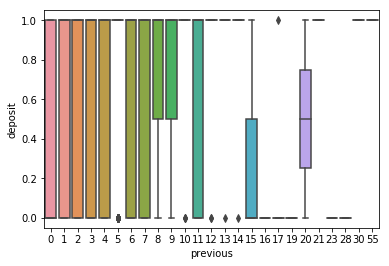

In [29]:
sns.boxplot(x='previous', y='deposit', data=df)

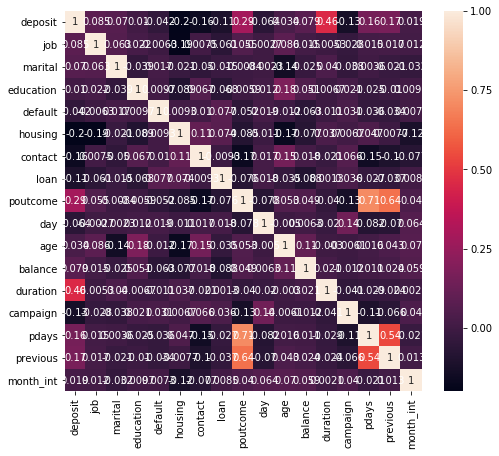

In [31]:
#to check Cor-relation
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

deposit         AxesSubplot(0.125,0.536818;0.0731132x0.343182)
job          AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
marital      AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
education    AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
default      AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
housing      AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
contact      AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
loan         AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
poutcome     AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
day                AxesSubplot(0.125,0.125;0.0731132x0.343182)
age             AxesSubplot(0.212736,0.125;0.0731132x0.343182)
balance         AxesSubplot(0.300472,0.125;0.0731132x0.343182)
duration        AxesSubplot(0.388208,0.125;0.0731132x0.343182)
campaign        AxesSubplot(0.475943,0.125;0.0731132x0.343182)
pdays           AxesSubplot(0.563679,0.125;0.0731132x0.343182)
previous        AxesSubplot(0.651415,0.125;0.0731132x0.

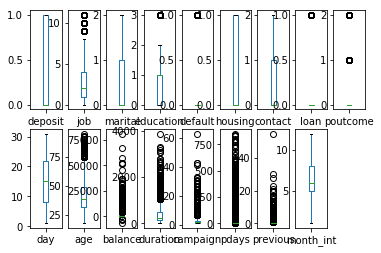

In [32]:
df.plot(kind='box',subplots=True,layout=(2,9))

From here we can observe that balance ,age ,campaign contains outliers alot compare to other features .

In [33]:
def print_quantile_info(qu_dataset, qu_field):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))

In [34]:
print_quantile_info(df, "balance")

interquartile range: 1575.0
upper_inner_fence: 4056.5
lower_inner_fence: -2243.5
upper_outer_fence: 6419.0
lower_outer_fence: -4606.0
percentage of records out of inner fences: 9.47
percentage of records out of outer fences: 4.56


In [35]:
print_quantile_info(df, "age")

interquartile range: 17.0
upper_inner_fence: 74.5
lower_inner_fence: 6.5
upper_outer_fence: 100.0
lower_outer_fence: -19.0
percentage of records out of inner fences: 1.51
percentage of records out of outer fences: 0.00


In [36]:
def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))
    
    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset
    
    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset

In [37]:
df.dropna(inplace=True)
new_dataset = remove_outliers_using_quantiles(df, "balance", "inner")

interquartile range: 1575.0
upper_inner_fence: 4056.5
lower_inner_fence: -2243.5
upper_outer_fence: 6419.0
lower_outer_fence: -4606.0
percentage of records out of inner fences: 9.47
percentage of records out of outer fences: 4.56
length of input dataframe: 10625
length of new dataframe after outlier removal: 9619


In [38]:
new_dataset.head()

,deposit,job,marital,education,default,housing,contact,loan,poutcome,day,age,balance,duration,campaign,pdays,previous,month_int
0,1,3,0,0,0,1,1,0,0,5,59,2343,1042,1,-1,0,5
1,1,3,0,0,0,0,1,0,0,5,56,45,1467,1,-1,0,5
2,1,2,0,0,0,1,1,0,0,5,41,1270,1389,1,-1,0,5
3,1,4,0,0,0,1,1,0,0,5,55,2476,579,1,-1,0,5
4,1,3,0,1,0,0,1,0,0,5,54,184,673,2,-1,0,5


## Before Outlier Removal

Text(0.5,1,'Histogram for bank balance Before Removal')

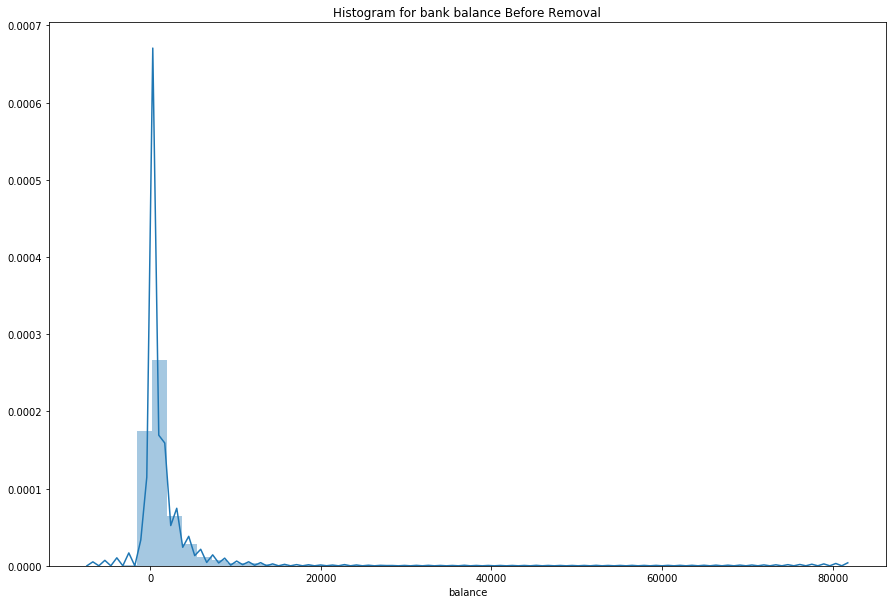

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.distplot(df["balance"]);
plt.title('Histogram for bank balance Before Removal')

Text(0.5,1,'Histogram for bank blance After Removal')

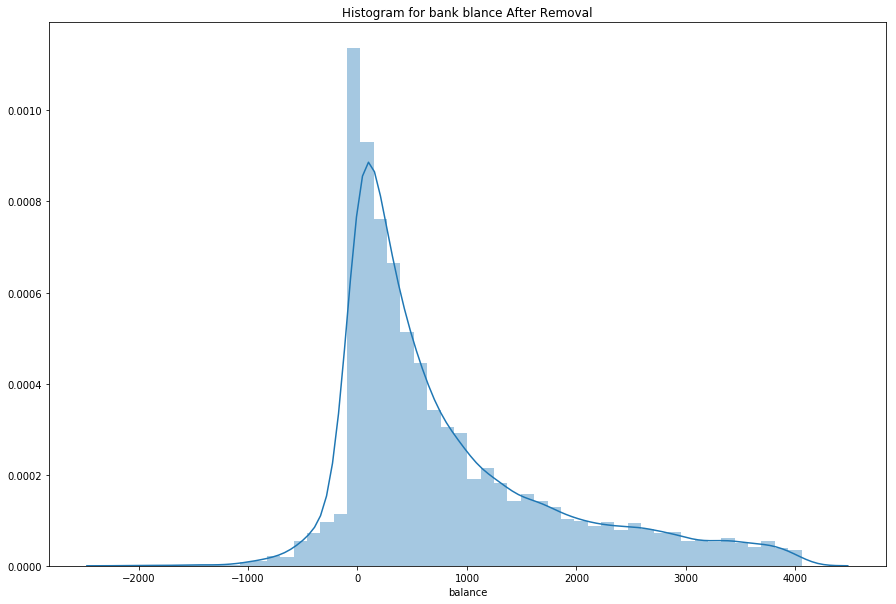

In [40]:
plt.figure(figsize=(15,10))
sns.distplot(new_dataset["balance"]);
plt.title('Histogram for bank blance After Removal')

In [41]:
new_dataset.shape

(9619, 17)

In [42]:
df.shape

(10625, 17)

## Removing Outliers Using Z-score 

In [43]:
#removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.06427329, 0.04077986, 0.7853074 , ..., 0.43636222, 0.35747553,
        0.47592318],
       [1.06427329, 0.04077986, 0.7853074 , ..., 0.43636222, 0.35747553,
        0.47592318],
       [1.06427329, 0.32579038, 0.7853074 , ..., 0.43636222, 0.35747553,
        0.47592318],
       ...,
       [0.93960828, 0.32579038, 0.65677541, ..., 0.43636222, 0.35747553,
        0.70416638],
       [0.93960828, 0.32579038, 0.7853074 , ..., 1.27998451, 2.33321411,
        0.47592318],
       [0.93960828, 0.32579038, 0.7853074 , ..., 0.43636222, 0.35747553,
        0.3108032 ]])

In [44]:
threshold=3
np.where((z>3))

(array([    1,    11,    12, ..., 10589, 10603, 10609], dtype=int64),
 array([12, 12, 12, ...,  4, 13,  4], dtype=int64))

In [45]:
z[34][2]

2.098858226961444

In [46]:
df_new=df[(z<3).all(axis=1)]#removing outliers

In [47]:
df_new.shape

(9288, 17)

In [48]:
df.shape

(10625, 17)

In [49]:
import math
def plot_multiple_histograms(df_new, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df_new[col], kde=True, ax=axs)
            else:
                sns.distplot(df_new[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df_new[col], kde=True, ax=axs[i, j])

    

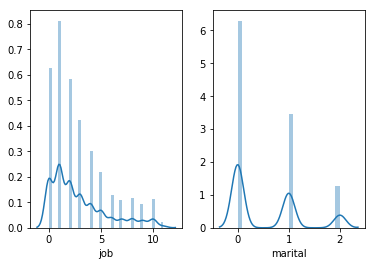

In [50]:
plot_multiple_histograms(df_new, ['job', 'marital'])

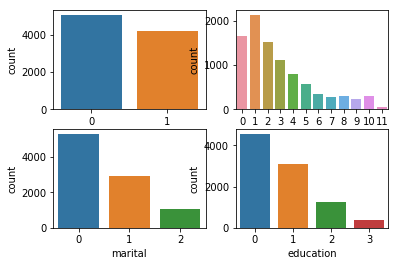

In [51]:
# this plots multiple seaborn countplots on different subplots.
# 
def plot_multiple_countplots(df_new, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=df_new[col], ax=axs)
            else:
                sns.countplot(x=df+new[col], ax=axs[j])
        else:
            sns.countplot(x=df_new[col], ax=axs[i, j])
            
            
plot_multiple_countplots(df_new,['deposit','job','marital','education'])


## Analysis of the response column
It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'deposit' column and compare its values to other columns.
First of all we should look at the number of 'yes' and 'no' values in the response column 'deposit'.

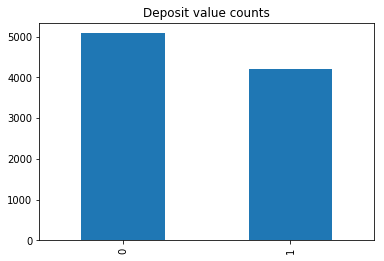

In [52]:
value_counts = df_new['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

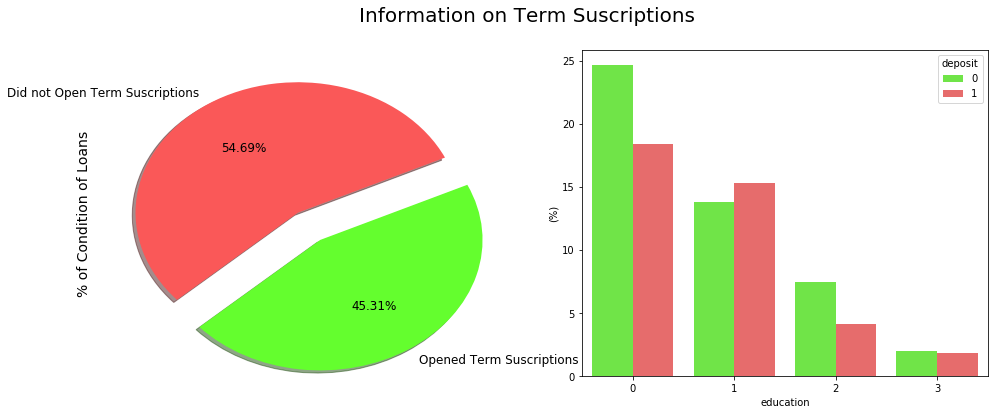

In [53]:
f, ax = plt.subplots(1,2, figsize=(16,6))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df_new["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df_new, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

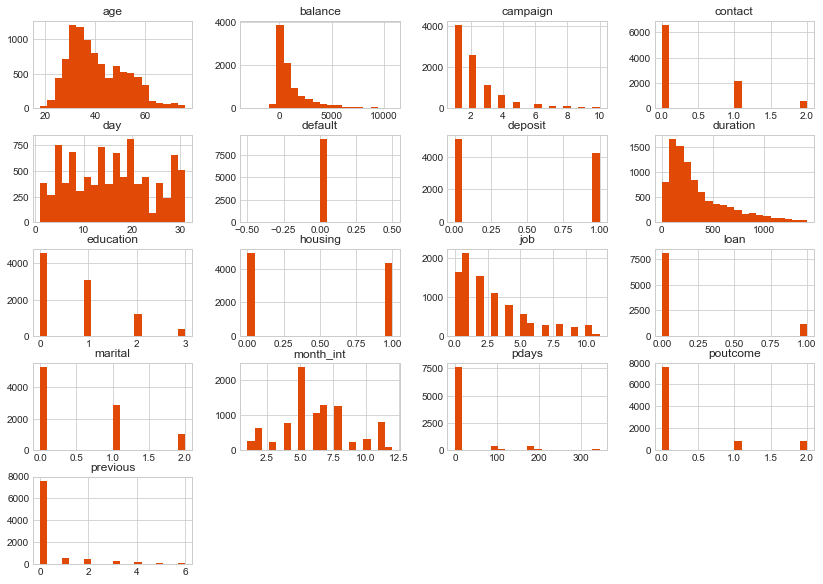

In [54]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df_new.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

## Machine Learning Model for Prediction

In [61]:
x=df_new.drop('deposit',axis=1)
y=df_new['deposit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [62]:
gbcr=GradientBoostingClassifier()
bc=BaggingClassifier()
dc=DecisionTreeClassifier()
abc=AdaBoostClassifier()
lda=LinearDiscriminantAnalysis()
lr=LogisticRegression()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier(8)#'Decision Tree Classifier':DecisionTreeClassifier(),'Gaussian Naive Bayes Classifier':GaussianNB(),'Support Vector Classifier':SVC(probability=True),}

************** GradientBoostingClassifier ***********


GradientBoostingClassifier()


accuracy score 0.8546824542518837


G:\DOWNLOADS\Programs\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross-val-score= 0.8242971357063403


roc_auc_score 0.8546538184045386


              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1517
           1       0.83      0.85      0.84      1270

    accuracy                           0.85      2787
   macro avg       0.85      0.85      0.85      2787
weighted avg       0.86      0.85      0.85      2787



[[1297  220]
 [ 185 1085]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


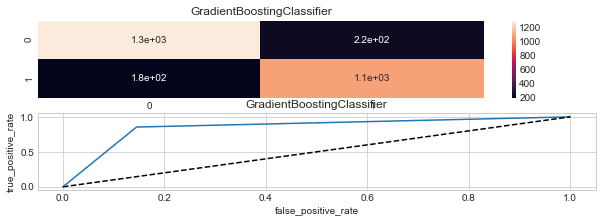

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8589881593110872


G:\DOWNLOADS\Programs\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross-val-score= 0.8236675009269557


roc_auc_score 0.8603397713057787


              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1517
           1       0.83      0.88      0.85      1270

    accuracy                           0.86      2787
   macro avg       0.86      0.86      0.86      2787
weighted avg       0.86      0.86      0.86      2787



[[1282  235]
 [ 158 1112]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


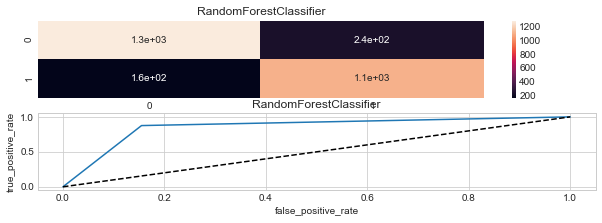

************** KNeighborsClassifier ***********


KNeighborsClassifier(n_neighbors=8)


accuracy score 0.7545748116254036


G:\DOWNLOADS\Programs\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross-val-score= 0.7443819521690768


roc_auc_score 0.7457728421719204


              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1517
           1       0.78      0.65      0.71      1270

    accuracy                           0.75      2787
   macro avg       0.76      0.75      0.75      2787
weighted avg       0.76      0.75      0.75      2787



[[1282  235]
 [ 449  821]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


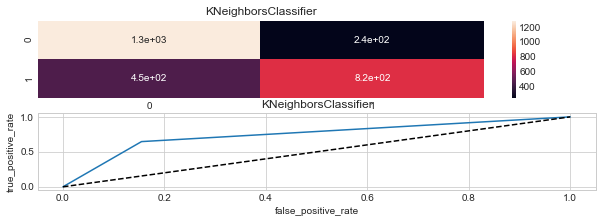

************** BaggingClassifier ***********


BaggingClassifier()


accuracy score 0.8349479727305347


G:\DOWNLOADS\Programs\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross-val-score= 0.8021389506859473


roc_auc_score 0.8326797606133116


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1517
           1       0.83      0.81      0.82      1270

    accuracy                           0.83      2787
   macro avg       0.83      0.83      0.83      2787
weighted avg       0.83      0.83      0.83      2787



[[1302  215]
 [ 245 1025]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


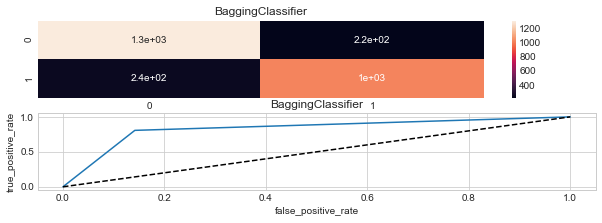

************** LogisticRegression ***********


LogisticRegression()



G:\DOWNLOADS\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
G:\DOWNLOADS\Programs\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



accuracy score 0.7771797631862217


G:\DOWNLOADS\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
G:\DOWNLOADS\Programs\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Cross-val-score= 0.7696880793474231


roc_auc_score 0.7707041975718757


              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1517
           1       0.79      0.70      0.74      1270

    accuracy                           0.78      2787
   macro avg       0.78      0.77      0.77      2787
weighted avg       0.78      0.78      0.78      2787



[[1280  237]
 [ 384  886]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


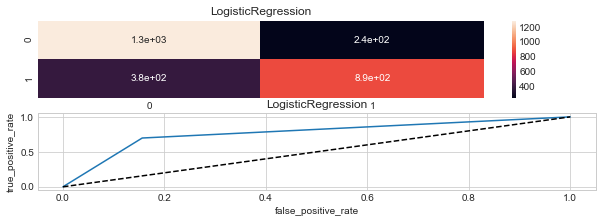

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7972730534625044


G:\DOWNLOADS\Programs\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross-val-score= 0.7593965517241379


roc_auc_score 0.7948668372616903


              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1517
           1       0.78      0.77      0.78      1270

    accuracy                           0.80      2787
   macro avg       0.80      0.79      0.80      2787
weighted avg       0.80      0.80      0.80      2787



[[1247  270]
 [ 295  975]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


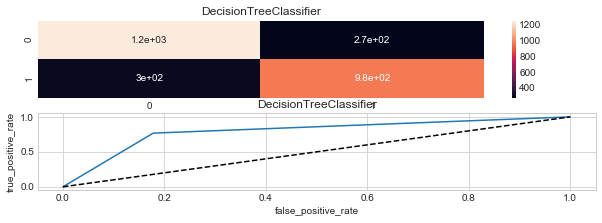

In [63]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
seed=7
#prepare models
models=[]
models.append(('GradientBoostingClassifier',gbcr))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knn))
models.append(('BaggingClassifier',bc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dc))


#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=20,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

#### Confusion Matrix :

* A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

* Each row in a confusion matrix represents an actual class, while each column represents a predicted class. For more info about the confusion matrix click here.
* The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. 

### Precision
precision = (TP) / (TP+FP)
* TP is the number of true positives, and FP is the number of false positives. 
* A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. 
 

### Recall
* recall = (TP) / (TP+FN)

* The F1 score favors classifiers that have similar precision and recall. 
This is not always what you want: in some contexts, we mostly care about precision, and in other contexts, we really care about the recall. For example, if we trained a classifier to detect videos that are safe for kids, we would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few terrible videos show up in your product (in such cases, we may even want to add a human pipeline to check the classifier’s video selection). On the other hand, suppose we train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

Gradient Boosting Clssifier working well compare to other and here Recall on Positive is 83 % and on Negative is 85 % 
so i think it's working well .

In [64]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score},columns=['Model','cvs','score'])
result

,Model,cvs,score
0,GradientBoostingClassifier,82.429714,85.468245
1,RandomForestClassifier,82.366750,85.898816
2,KNeighborsClassifier,74.438195,75.457481
3,BaggingClassifier,80.213895,83.494797
4,LogisticRegression,76.968808,77.717976
5,DecisionTreeClassifier,75.939655,79.727305


In [65]:
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
duration,0.345
age,0.089
balance,0.089
month_int,0.088
day,0.083
poutcome,0.047
job,0.045
housing,0.037
contact,0.037


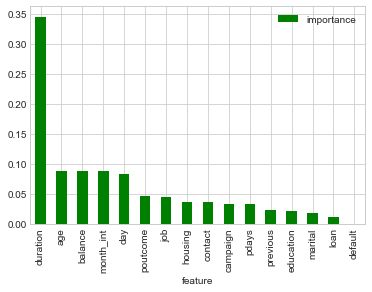

In [66]:
importances.plot.bar(color='green')

From here we can observe that default ,loan , marital and Education does't impact .

# Conclusion
* Key outcomes of the analysis are the recommendations for future marketing campaigns:

* The customer's account balance has a huge influence on the campaign's outcome. People with account balance above1490 are more likely to subscribe for term deposit, so future address those customers.
* The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.
* Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.